In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Data

In [122]:
data = pd.read_csv("cas_features_agreg_TEMP.csv",sep=';')
data.head()

,secteur_principal,visitor_rate,days_of_visit,sales_visited,buyer_rate,repeat,aov,ca
0,LOISIRS MULTI-SECTEURS,0.946768,66.097724,261.124498,0.536122,4.347518,71.936919,312.747031
1,BILLETERIE - SPORTS,0.867865,44.354817,147.801052,0.361872,2.886435,70.925882,204.722971
2,MATERIEL SPORT,0.942097,68.151274,254.243305,0.500608,4.027930,69.414245,279.595691
3,EDITION,0.959327,77.308251,309.331481,0.598674,4.798698,54.192184,260.051943
4,SPORTSWEAR,0.953659,75.558271,266.301137,0.571030,4.088860,59.865360,244.781103


# PCA

### PCA 1

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [53]:
## Scale data
features = ['visitor_rate','days_of_visit','sales_visited','buyer_rate','repeat','aov','ca']

scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
data.head()

,secteur_principal,visitor_rate,days_of_visit,sales_visited,buyer_rate,repeat,aov,ca
0,LOISIRS MULTI-SECTEURS,0.359263,-0.118074,0.070035,0.234744,0.314668,0.467858,0.817015
1,BILLETERIE - SPORTS,-1.412931,-1.778791,-1.861228,-1.696237,-1.758372,0.389380,-1.196106
2,MATERIEL SPORT,0.254355,0.038775,-0.047235,-0.158809,-0.138776,0.272044,0.199212
3,EDITION,0.641351,0.738183,0.891580,0.927928,0.954821,-0.909515,-0.165003
4,SPORTSWEAR,0.514038,0.604520,0.158255,0.621588,-0.052325,-0.469155,-0.449588


In [99]:
pca = PCA(n_components=3)
pca.fit(data[features])
reduced = pca.transform(data[features])
print(pca.explained_variance_ratio_)

[0.70191241 0.22567527 0.03529035]


In [86]:
range(len(features))

range(0, 7)

C:\Users\rrespriget\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


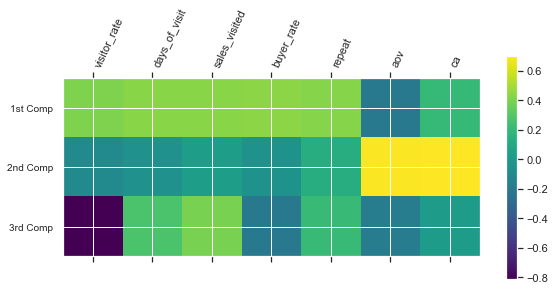

In [89]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left')
plt.tight_layout()
plt.show()

### PCA avec visualisation

,secteur_principal,visitor_rate,days_of_visit,sales_visited,buyer_rate,repeat,aov,ca,PC1,PC2,PC3
0,LOISIRS MULTI-SECTEURS,0.946768,66.097724,261.124498,0.536122,4.347518,71.936919,312.747031,29.803866,32.862609,-2.725234
1,BILLETERIE - SPORTS,0.867865,44.354817,147.801052,0.361872,2.886435,70.925882,204.722971,-127.578711,18.435329,-0.038759
2,MATERIEL SPORT,0.942097,68.151274,254.243305,0.500608,4.027930,69.414245,279.595691,4.489970,10.580004,0.727129
3,EDITION,0.959327,77.308251,309.331481,0.598674,4.798698,54.192184,260.051943,36.600589,-41.233427,-0.761619
4,SPORTSWEAR,0.953659,75.558271,266.301137,0.571030,4.088860,59.865360,244.781103,-6.321979,-26.470297,0.956408


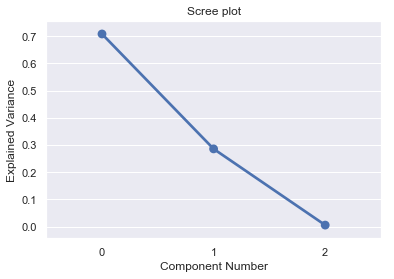

C:\Users\rrespriget\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


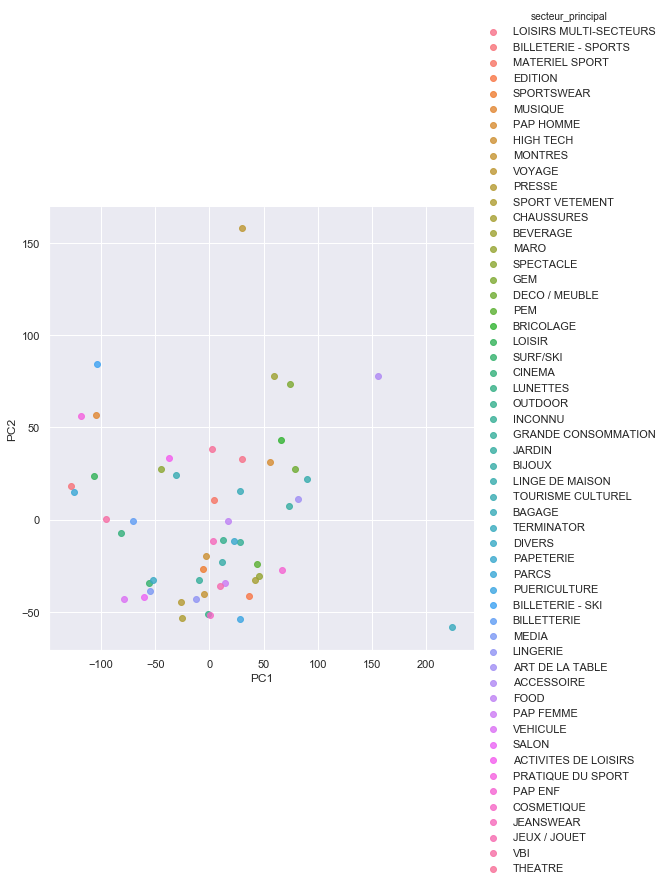

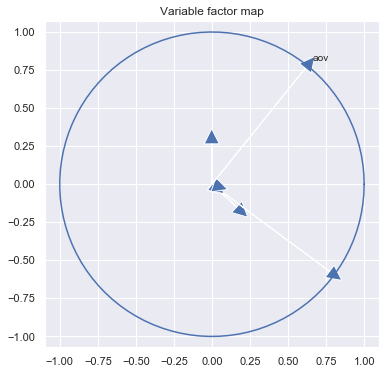

In [127]:
import matplotlib.pyplot as plt

features = ['visitor_rate','days_of_visit','sales_visited','buyer_rate','repeat','aov','ca']
df = data

n_components = 3

# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df[features])

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

display(df.head())

# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(6, 4))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

# Show the points in terms of the first two PCs
g = sns.lmplot('PC1',
               'PC2',
               hue='secteur_principal',data=df,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(6, 6))
for i in range(pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

plt.text(pca.components_[0, i] + 0.05,
         pca.components_[1, i] + 0.05,
         df.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

In [124]:
df.head()

,secteur_principal,visitor_rate,days_of_visit,sales_visited,buyer_rate,repeat,aov,ca,PC1,PC2,PC3
0,LOISIRS MULTI-SECTEURS,0.946768,66.097724,261.124498,0.536122,4.347518,71.936919,312.747031,29.803866,32.862609,-2.725234
1,BILLETERIE - SPORTS,0.867865,44.354817,147.801052,0.361872,2.886435,70.925882,204.722971,-127.578711,18.435329,-0.038759
2,MATERIEL SPORT,0.942097,68.151274,254.243305,0.500608,4.027930,69.414245,279.595691,4.489970,10.580004,0.727129
3,EDITION,0.959327,77.308251,309.331481,0.598674,4.798698,54.192184,260.051943,36.600589,-41.233427,-0.761619
4,SPORTSWEAR,0.953659,75.558271,266.301137,0.571030,4.088860,59.865360,244.781103,-6.321979,-26.470297,0.956408


In [ ]:
df

# K-means sur base réduite

C:\Users\rrespriget\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\rrespriget\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


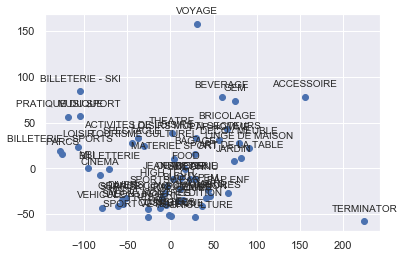

In [276]:
xs = df[['PC1']].as_matrix()
ys = df[['PC2']].as_matrix()
plt.scatter(df[['PC1']], df[['PC2']])

numit=-1
for x,y in zip(xs,ys):
    numit +=1
    plt.annotate(labels[numit], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [192]:
# Sélection des secteurs + 3 premières composantes principales
array_red = df[['PC1','PC2','PC3']].as_matrix()

C:\Users\rrespriget\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


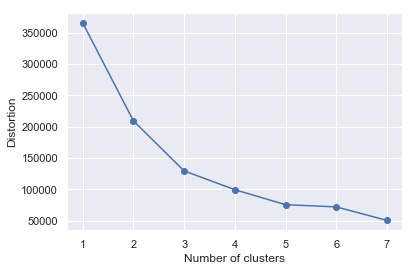

In [218]:
# calculate distortion for a range of number of cluster // INERTIA
from sklearn.cluster import KMeans

distortions = []
for i in range(1,8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=1337
    )
    km.fit(array_red)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

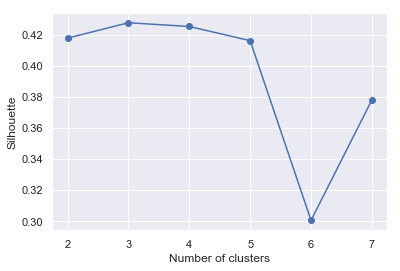

In [224]:
# calculate distortion for a range of number of cluster // SILHOUETTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouettes = []
for i in range(2,8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=1337
    )
    km.fit(array_red)
    silhouettes.append(silhouette_score(array_red, km.labels_))

# plot
plt.plot(range(2, 8), silhouettes, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [225]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=1337
)

y_km = km.fit_predict(array_red)

print(silhouette_score(array_red, km.labels_))
print(km.inertia_)

0.42760768252541054
129543.24305639073


In [230]:
# plot the 5 clusters

plt.figure(figsize=(10,6), dpi=80)

plt.scatter(
    array_red[y_km == 0, 0], array_red[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    array_red[y_km == 1, 0], array_red[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    array_red[y_km == 2, 0], array_red[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    array_red[y_km == 3, 0], array_red[y_km == 3, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 4'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-230-7d90109af1c7>, line 41)

In [232]:
array_red[y_km == 2, 0]

array([-127.57871123, -104.73006563,  -44.69998886, -106.81679767,
        -56.05267705,  -81.54507397,  -30.75782506,  -51.8304005 ,
       -125.52504907, -104.06778112,  -70.51513229,  -54.65505846,
        -79.07407605,  -60.21377898,  -37.15586826, -118.31824919,
        -95.26246626])

In [242]:
labels = df['secteur_principal'].tolist()

<Figure size 432x288 with 0 Axes>

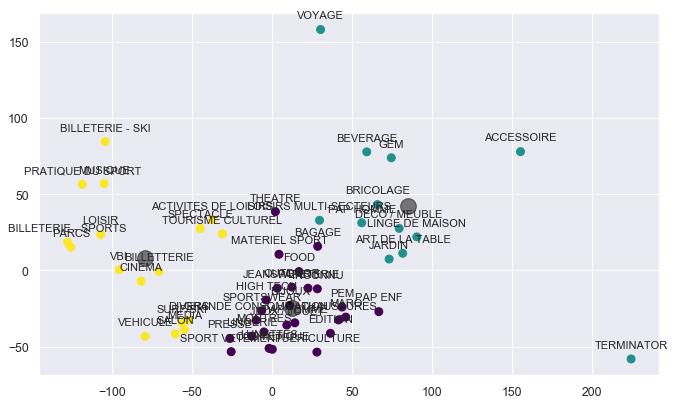

In [277]:
plt.clf()
plt.figure(figsize=(10,6), dpi=80)

xs = array_red[:, 0]
ys = array_red[:, 1]
plt.scatter(xs , ys, c=y_km, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

numit=-1
for x,y in zip(xs,ys):
    numit +=1
    plt.annotate(labels[numit], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

# K-means sur base réduite / Hors Terminator, Accessoire & Voyage

In [283]:
print(df[['secteur_principal','PC1']].sort_values(by=['PC1'], ascending = False).head())
print(df[['secteur_principal','PC2']].sort_values(by=['PC2'], ascending = False).head())

   secteur_principal         PC1
32        TERMINATOR  224.386220
42        ACCESSOIRE  155.325599
29   LINGE DE MAISON   90.566638
41   ART DE LA TABLE   81.747071
17     DECO / MEUBLE   79.526327
   secteur_principal         PC2
9             VOYAGE  157.909764
37  BILLETERIE - SKI   84.361172
42        ACCESSOIRE   77.862181
13          BEVERAGE   77.723841
16               GEM   73.828447


In [293]:
array_rednew = df[(df['secteur_principal']!='TERMINATOR') & (df['secteur_principal']!='ACCESSOIRE') & (df['secteur_principal']!='VOYAGE')][['PC1','PC2','PC3']].as_matrix()

C:\Users\rrespriget\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


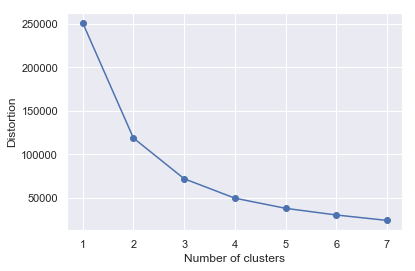

In [294]:
# calculate distortion for a range of number of cluster // INERTIA
from sklearn.cluster import KMeans

distortions = []
for i in range(1,8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=1337
    )
    km.fit(array_rednew)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [295]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=1337
)

y_km = km.fit_predict(array_rednew)

print(silhouette_score(array_rednew, km.labels_))
print(km.inertia_)

0.4483630132747037
72157.51846192573


In [310]:
labels = df[(df['secteur_principal']!='TERMINATOR') & (df['secteur_principal']!='ACCESSOIRE') & (df['secteur_principal']!='VOYAGE')]['secteur_principal'].tolist()

<Figure size 432x288 with 0 Axes>

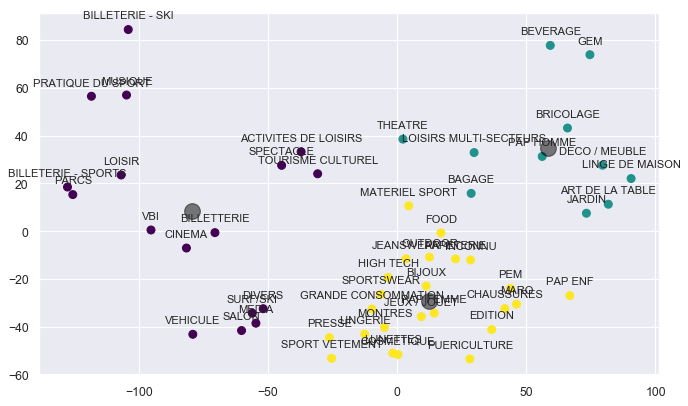

In [311]:
plt.clf()
plt.figure(figsize=(10,6), dpi=80)

xs = array_rednew[:, 0]
ys = array_rednew[:, 1]
plt.scatter(xs , ys, c=y_km, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

numit=-1
for x,y in zip(xs,ys):
    numit +=1
    plt.annotate(labels[numit], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()